In [22]:
! pip install pdf2image
!apt-get install poppler-utils
!pip install tesseract
! pip install Pillow
! pip install pytesseract
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [23]:
import cv2
import numpy as np
from IPython.display import display, Image
from pdf2image import convert_from_path
import pytesseract

In [24]:
# Replace 'input_file.pdf' with the path to your PDF file
pdf_path = '/content/sample_data/test-1.pdf'


pages = convert_from_path("/content/sample_data/test-1.pdf")

In [25]:
pdfs = r"/content/sample_data/test-1.pdf"
pages = convert_from_path(pdfs, 350)

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"
    page.save(image_name, "JPEG")
    i = i+1

In [26]:
# use this command to install open cv2
!pip install opencv-python

# use this command to install PIL
# pip install Pillow

import cv2
from PIL import Image

def mark_region(image_path):

    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])


    return image, line_items_coordinates



In [27]:
image, line_items_coordinates= mark_region('/content/Page_1.jpg')

Hello this is deepak Saini from EXL trying to extract information from a pdf having text and
images.
| will put an image now to check what will be the output. Here’s the image.
PREFACE
In 1939 the Yorkshire Parish Register Society, of which the
Parish Register Section of the Yorkshire Archacological Society is
the successor (the publications having been issued in numerical
sequence without any oreak) published as its Volume No. 108 the
entries in the Register of Wensley Parish Church from 1538 to 1700
inclusive. [hese entries comprised the tirst 110 pages (and a few lines
of p. J11) of the oldest register at Wensley. ‘The present volume
continues the record down to the end of 1837, in accordance with our
current practice.
The following are particulars of ail the register books with
which this volume is concerned; the numbers are those which had
already been marked on the front covers :—
No. 1. Parchment, bound in leather, 12 in. x 8 in.:—
Baptisms & Burials 1538 -- 1769
Marnages 1538 -

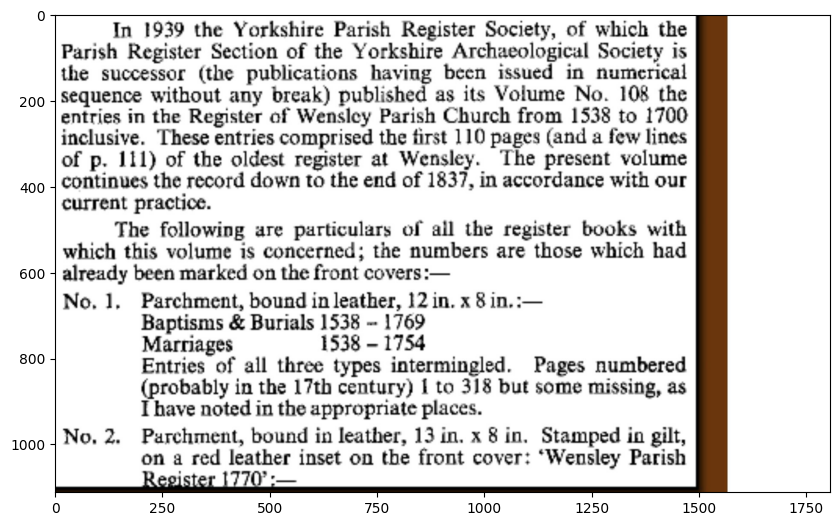

In [28]:
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# load the original image
image = cv2.imread('/content/Page_1.jpg')

# # get co-ordinates to crop the image
c = line_items_coordinates[1]

# cropping image img = image[y0:y1, x0:x1]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]

plt.figure(figsize=(10,10))
plt.imshow(img)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(image,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

In [29]:
def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

In [30]:
def extract_text_from_image(image):
    text = pytesseract.image_to_string(image)
    return text

In [31]:
extracted_text = []

for page in pages:
    # Step 2: Preprocess the image (deskew)
    preprocessed_image = deskew(np.array(page))

    # Step 3: Extract text using OCR
    text = extract_text_from_image(preprocessed_image)
    extracted_text.append(text)

In [32]:
for item in extracted_text:
    print(item)

Images.

| will put an image now to check what will be the output. Here’s the image.

PREFACE

In 1939 the Yorkshire Parish Register Society, of which the
Parish Register Section of the Yorkshire Archaeological Society is
the successor (the publications having been issued in numerical
sequence without any break) published as its Volume No. 108 the
entries in the Register of Wensley Parish Church from 1538 to 1700
inclusive. These entries comprised the first 110 pages (and a few lines
of p. 111) of the oldest register at Wensley. The present volume
continues the record down to the end of 1837, in accordance with our
current practice.

The following are particulars of all the register books with
which this volume is concerned; the numbers are those which had
already been marked on the front covers :—

No. 1, Parchment, bound in leather, 12 in. x 8 in.:—
Baptisms & Burials 1538 - 1769
Marnages 1538 - 1754
Entries of all three types intermingled. Pages numbered
(probably in the 17th centur